In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from keras.datasets import imdb

In [0]:
import keras
from tensorboardcolab import *

In [0]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [93]:
print(x_train.shape, y_train.shape)

(25000,) (25000,)


In [94]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
word_idx = imdb.get_word_index()

In [96]:
list(word_idx.items())[10:20]

[("hold's", 52009),
 ('comically', 11307),
 ('localized', 40830),
 ('disobeying', 30568),
 ("'royale", 52010),
 ("harpo's", 40831),
 ('canet', 52011),
 ('aileen', 19313),
 ('acurately', 52012),
 ("diplomat's", 52013)]

In [0]:
idx_word = dict([v, k] for (k, v) in word_idx.items())

In [98]:
list(idx_word.items())[10:20]

[(52009, "hold's"),
 (11307, 'comically'),
 (40830, 'localized'),
 (30568, 'disobeying'),
 (52010, "'royale"),
 (40831, "harpo's"),
 (52011, 'canet'),
 (19313, 'aileen'),
 (52012, 'acurately'),
 (52013, "diplomat's")]

In [0]:
def decodeReview(review):
  actual_review = ' '.join([idx_word.get(idx - 3, '?') for idx in review])
  return actual_review

In [100]:
decodeReview(x_train[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### preprocessing for RNN

In [0]:
from keras.preprocessing import sequence

In [0]:
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

In [103]:
print(x_train.shape, x_test.shape)

(25000, 500) (25000, 500)


In [0]:
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

####  RNN model

In [0]:
from keras.layers import *
from keras.models import Sequential

In [106]:
model = Sequential()

model.add(Embedding(10000, 50))
model.add(SimpleRNN(100))
model.add(Dense(2,  activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 50)          500000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 100)               15100     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 202       
Total params: 515,302
Trainable params: 515,302
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from keras.callbacks import *
cp = ModelCheckpoint('model.h5', monitor = 'val_loss', save_best_only = "True")
es = EarlyStopping(monitor = 'val_acc', patience = 1)

In [109]:
tbc= TensorBoardColab()


Wait for 8 seconds...
TensorBoard link:
https://38cab0f1.ngrok.io


In [110]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=128, callbacks=[cp, es, TensorBoardColabCallback(tbc)])

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 37s 1ms/step - loss: 0.6624 - acc: 0.5925 - val_loss: 0.5916 - val_acc: 0.6821
Epoch 2/20
25000/25000 [==============================] - 36s 1ms/step - loss: 0.4641 - acc: 0.7805 - val_loss: 0.4242 - val_acc: 0.8133
Epoch 3/20
25000/25000 [==============================] - 36s 1ms/step - loss: 0.2426 - acc: 0.9015 - val_loss: 0.4816 - val_acc: 0.7874


In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_loss_acc():
  plt.plot(hist.history['val_loss'], label = "val_loss")
  plt.plot(hist.history['loss'], label = "training_loss")
  plt.plot(hist.history['val_acc'], label = "val_accuracy")
  plt.plot(hist.history['acc'], label = "training_accruacy")
  plt.legend()
  plt.show()

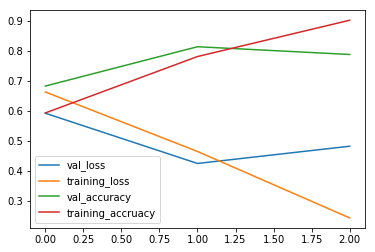

In [113]:
plot_loss_acc()

In [114]:
!pip install tensorboardcolab